# Importamos las librerias necesarias.

In [1]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [3]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# Generamos datos de manera aleatoria de tal manera que $-1\leq x,y\leq1$ y $x^2+y^2=z^2$.

In [4]:
from numpy import random
lista=[]
n=1000
for i in range(n):
    for j in range(n):
        lista.append([random.rand()*2-1,random.rand()*2-1])
        #lista.append([(i-(n-1)/2)/((n-1)/2),(j-(n-1)/2)/((n-1)/2)])

valores_x=[]        
valores_y=[]        
valores_z=[]
for item in lista:
    valores_x.append(item[0])
    valores_y.append(item[0])
    valores_z.append((item[0]**2+item[1]**2)**(1/2))


# Visualizamos los datos generados.

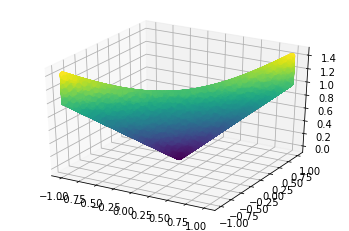

In [5]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = valores_z
x_points = valores_x
y_points = valores_y
ax.scatter3D(x_points, y_points, z_points, c=z_points);


plt.show()

# Dividimos los datos.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(lista), np.array(valores_z), test_size=0.20, random_state=42)

# Contruimos la arquitectura de la red neuronal artificial.

In [7]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[2]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
  ])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


# Realizamos el ajuste del modelo con los datos generados anteriormente.

In [8]:
model.fit(x=X_train, y=y_train, batch_size=5, epochs=5, verbose=1, validation_data=(X_test, y_test),shuffle=True)

Epoch 1/5
160000/160000 [==============================] - 180s 1ms/step - loss: 8.4608e-04 - mae: 0.0051 - mse: 8.4608e-04 - val_loss: 7.1298e-06 - val_mae: 0.0022 - val_mse: 7.1298e-06
Epoch 2/5
160000/160000 [==============================] - 173s 1ms/step - loss: 9.0645e-06 - mae: 0.0021 - mse: 9.0645e-06 - val_loss: 8.2362e-06 - val_mae: 0.0023 - val_mse: 8.2362e-06
Epoch 3/5
160000/160000 [==============================] - 170s 1ms/step - loss: 6.9533e-06 - mae: 0.0018 - mse: 6.9533e-06 - val_loss: 2.2493e-06 - val_mae: 0.0012 - val_mse: 2.2493e-06
Epoch 4/5
160000/160000 [==============================] - 174s 1ms/step - loss: 6.0276e-06 - mae: 0.0017 - mse: 6.0276e-06 - val_loss: 9.5621e-07 - val_mae: 7.7420e-04 - val_mse: 9.5621e-07
Epoch 5/5
160000/160000 [==============================] - 172s 1ms/step - loss: 5.5380e-06 - mae: 0.0016 - mse: 5.5380e-06 - val_loss: 2.5904e-06 - val_mae: 0.0012 - val_mse: 2.5904e-06


# Generamos una nueva lista de datos aleatorios para poder validar el desempeño de nuestro modelo.

In [9]:
from numpy import random

lista2=[]
n=100
for i in range(n):
    for j in range(n):
        lista2.append([random.rand()*2-1,random.rand()*2-1])

        
resultados=[]
val_x=[]        
val_y=[] 

for item in lista2:
    resultados.append((item[0]**2+item[1]**2)**(1/2))
    val_x.append(item[0])
    val_y.append(item[1])
    
y_pred= model.predict(np.array(lista2))
resultados = np.array(resultados)

# Obtenemos el score de nuestro modelo, el cual resulta ser muy bueno.

In [10]:
from sklearn.metrics import r2_score
score = r2_score(resultados, y_pred)
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: 1.0


# Finalmente, visualizamos los datos generados por el modelo y vemos que efectivamente se forma un cono.

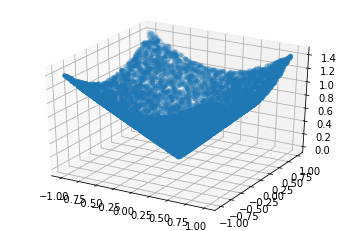

In [11]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = y_pred
x_points = np.array(val_x)
y_points = np.array(val_y)
ax.scatter3D(x_points, y_points, z_points, linewidth=0.000001);


plt.show()

# Fin del código.